<a href="https://colab.research.google.com/github/computerGuy11/Handwritten-digit-recognition-with-CNNs/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform
import keras
from tensorflow.keras.optimizers.legacy import Adam
tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)


In [27]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)



In [32]:


print('X_train:', x_train.shape)
print('y_train:', y_train.shape)



X_train: (60000, 28, 28)
y_train: (60000,)


In [38]:


# Save image parameters to the constants that we will use later for data re-shaping and for model traning.


# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);




IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [47]:


x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)


x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)



In [48]:


x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255



In [49]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

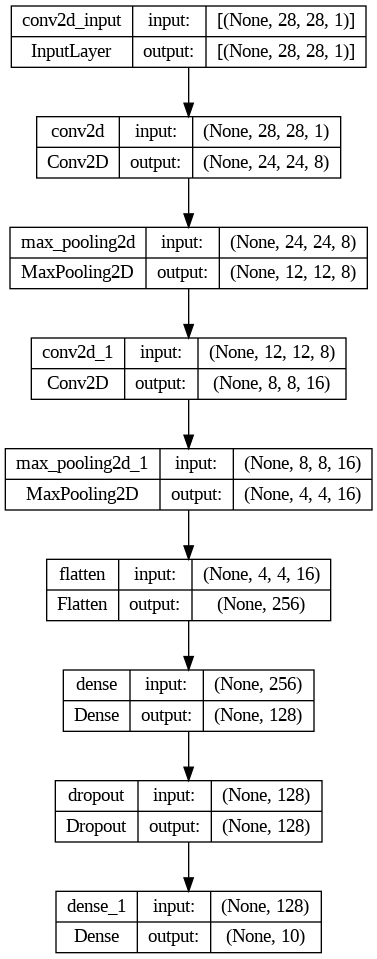

In [51]:


tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)



In [52]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [55]:


log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=2,
    validation_data=(x_train, y_train),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")



Epoch 1/2
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0529 - accuracy: 0.9837 - val_loss: 4.5604 - val_accuracy: 0.9884
Epoch 2/2
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 4.1907 - val_accuracy: 0.9909
The model has successfully trained


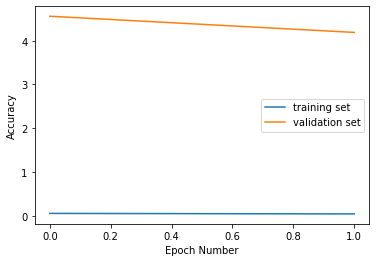

In [56]:


plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()



In [58]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)



1875/1875 [==============================] - 14s 7ms/step - loss: 0.0261 - accuracy: 0.9914
Train loss:  0.026053650304675102
Train accuracy:  0.9913833141326904


In [59]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

loaded_model = tf.keras.models.load_model(model_name)



In [60]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

313/313 [==============================] - 3s 9ms/step
predictions_one_hot: (10000, 10)


In [61]:


pd.DataFrame(predictions_one_hot)



,0,1,2,3,4,5,6,7,8,9
0,3.582457e-11,4.844804e-09,1.436559e-08,5.592653e-09,4.473297e-10,4.507545e-11,8.252207e-16,9.999999e-01,1.679257e-09,4.602807e-08
1,9.242603e-10,6.216395e-07,9.999993e-01,3.519504e-13,1.037551e-10,1.525069e-13,1.108393e-09,1.589689e-11,1.363271e-10,3.849248e-13
2,5.020005e-08,9.999458e-01,4.659384e-06,9.305060e-10,8.948931e-06,2.330902e-06,1.258696e-05,2.424868e-05,1.239250e-06,4.874984e-08
3,9.990981e-01,1.440083e-07,5.732720e-05,3.518552e-06,1.020729e-06,4.146487e-05,5.501919e-04,8.804395e-07,5.319413e-05,1.941333e-04
4,9.908707e-10,1.030608e-06,2.441251e-09,9.862615e-12,9.990087e-01,4.864791e-11,4.004380e-10,5.016295e-08,5.486629e-08,9.900633e-04
...,...,...,...,...,...,...,...,...,...,...
9995,3.777644e-14,1.597141e-06,9.999869e-01,1.868326e-10,3.295275e-12,9.028587e-15,1.257849e-14,1.144176e-05,1.680894e-11,1.382378e-15
9996,1.316794e-11,1.142367e-06,8.171686e-09,9.999793e-01,1.911964e-11,1.899739e-05,1.231540e-12,1.602956e-08,8.846238e-09,5.248781e-07
9997,1.713882e-15,2.160359e-09,3.848017e-13,1.244952e-15,9.999998e-01,5.407954e-13,6.649534e-14,2.303250e-09,8.180554e-09,8.399687e-08
9998,1.797695e-11,1.707114e-11,6.801664e-14,7.313069e-08,5.827784e-12,9.999781e-01,1.072196e-06,4.588020e-14,2.058412e-05,1.959490e-09


In [106]:
predictions_one_hot = loaded_model.predict(np.array([x_test_normalized[0]]))


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 43ms/step
expected :  6
predictions_one_hot: 6


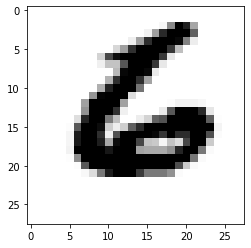

In [128]:
item = 9999
predictions_one_hot = loaded_model.predict(np.array([x_test_normalized[item]]))
print('expected : ' , y_test[item])
print('predictions_one_hot:', np.argmax(
    predictions_one_hot
)
)
plt.imshow(x_test_normalized[item].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

